In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn import datasets, model_selection
from tqdm import tqdm
from lab2_utils import *

## 1.D Data Generation

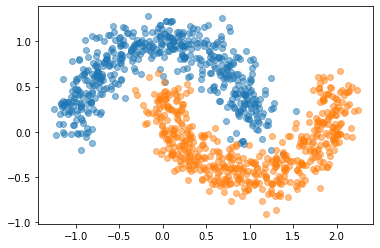

In [2]:
X, y = create_random_data(n_samples=1000, noise_level=0.15, dataset="moons", seed=932)
plot_dataset(X, y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
def binary_classif_error(y_true, y_pred):
    return np.mean(np.sign(y_pred) != y_true)

In [5]:
linear_model = Ridge(alpha = 0.1)
linear_model.fit(X_train, y_train)
linear_err = binary_classif_error(y_test, linear_model.predict(X_test))
print(linear_err)

0.11


## 1.E Choose Kernel and Kernel Parameters

In [6]:
rbf_model = KernelRidge(0.01, kernel="rbf", gamma=0.1)
rbf_model.fit(X_train, y_train)
rbf_err = binary_classif_error(y_test, rbf_model.predict(X_test))
print(rbf_err)

0.02


In [47]:
# 1. Change the regularization parameter gamma
gamma_values = np.geomspace(1e-3, 1e3, num=20)
test_errors = []

for gamma in gamma_values: 
    # TODO: Create the model and compute the test predictions
    rbf_model = KernelRidge(alpha = 1, kernel="rbf", gamma=gamma)
    rbf_model.fit(X_train, y_train)
    test_preds = rbf_model.predict(X_test)
    test_errors.append(binary_classif_error(y_test, test_preds))

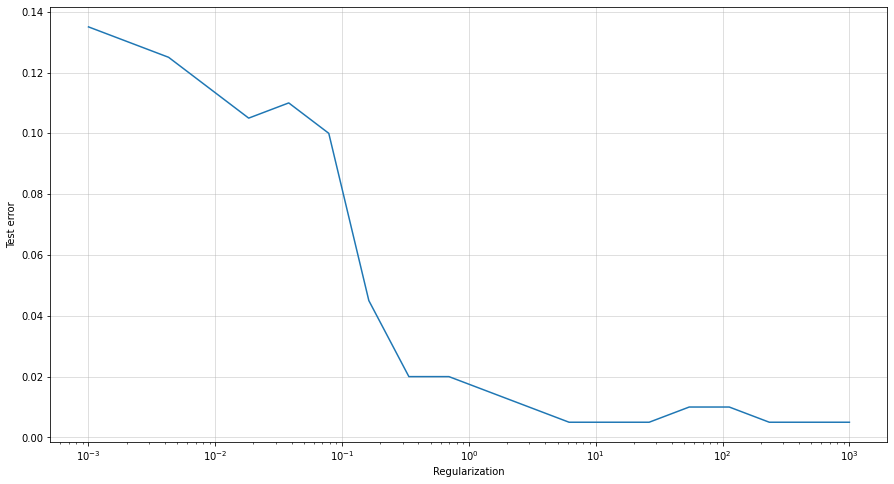

In [48]:
fig, ax = plt.subplots(figsize = (15,8))
#reg_values_comb = np.transpose([np.tile(alpha_values, len(gamma_values)), np.repeat(gamma_values, len(alpha_values))])
ax.semilogx(gamma_values, test_errors)
ax.set_xlabel("Regularization")
ax.set_ylabel("Test error");
ax.grid(alpha = 0.5);

In [68]:
# 1. Change the regularization parameter alpha
alpha_values = np.geomspace(1e-4, 1e3, num=50)
gamma = gamma_values[-1]
test_errors = []
for alpha in tqdm(alpha_values):
#for gamma in gamma_values: 
    # TODO: Create the model and compute the test predictions
    rbf_model = KernelRidge(alpha, kernel="rbf", gamma=gamma)
    rbf_model.fit(X_train, y_train)
    test_preds = rbf_model.predict(X_test)
    test_errors.append(binary_classif_error(y_test, test_preds))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.05it/s]


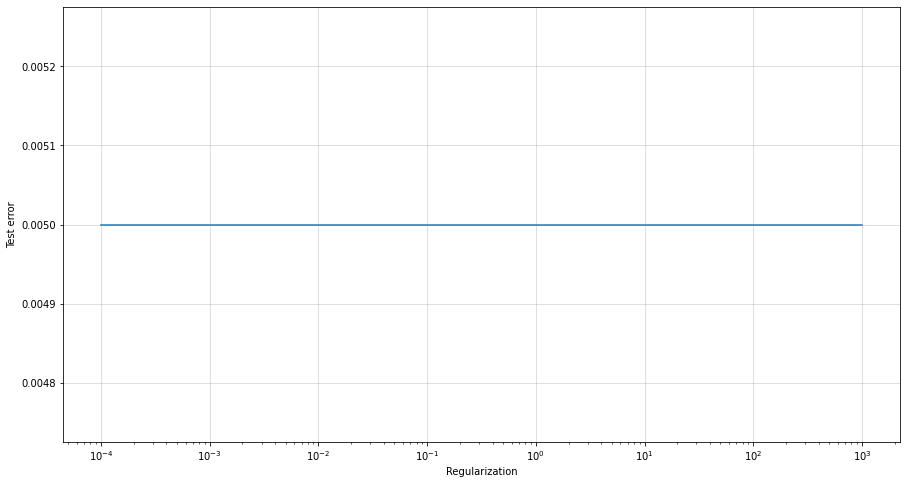

In [69]:
fig, ax = plt.subplots(figsize = (15,8))
#reg_values_comb = np.transpose([np.tile(alpha_values, len(gamma_values)), np.repeat(gamma_values, len(alpha_values))])
ax.semilogx(alpha_values, test_errors)
ax.set_xlabel("Regularization")
ax.set_ylabel("Test error");
ax.grid(alpha = 0.5);

## Cross Validation
### Combined GridSearchCV

In [70]:
from sklearn.metrics import make_scorer

param_grid = {
    "alpha": np.geomspace(1e-4, 5, num=20), 
    "gamma": np.geomspace(1e-3, 1e3, num=10),
}


model = KernelRidge(kernel = "rbf")
rbf_gs = model_selection.GridSearchCV(model, param_grid, n_jobs = -1, scoring = make_scorer(binary_classif_error, greater_is_better=False))

In [71]:
rbf_gs.fit(X_train, y_train)

GridSearchCV(estimator=KernelRidge(kernel='rbf'), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-04, 1.76731601e-04, 3.12340587e-04, 5.52004518e-04,
       9.75566420e-04, 1.72413415e-03, 3.04708988e-03, 5.38517071e-03,
       9.51729840e-03, 1.68200738e-02, 2.97263856e-02, 5.25359171e-02,
       9.28475673e-02, 1.64090992e-01, 2.90000636e-01, 5.12522766e-01,
       9.05789688e-01, 1.60081661e+00, 2.82914882e+00, 5.00000000e+00]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring=make_scorer(binary_classif_error, greater_is_better=False))

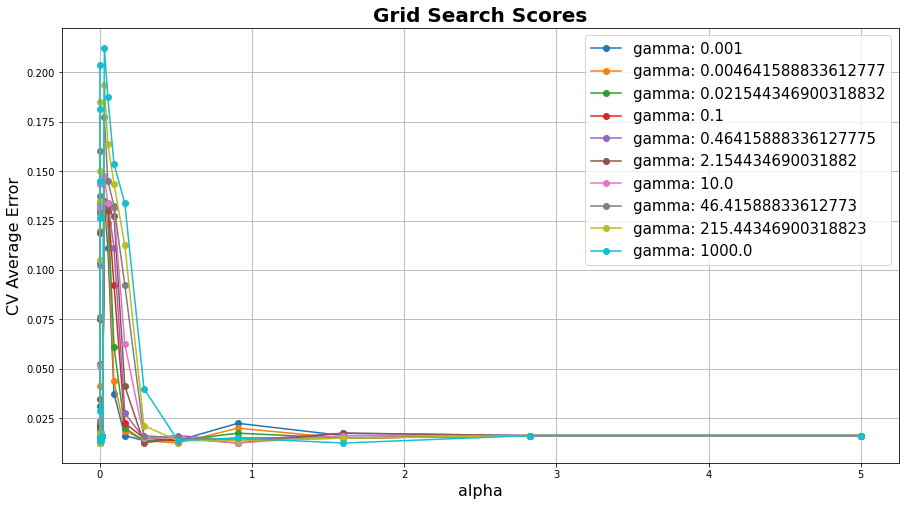

In [72]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = -np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    
    fig, ax = plt.subplots(1,1, figsize = (15, 8))
    

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Error', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(rbf_gs.cv_results_, param_grid["alpha"], param_grid["gamma"], 'alpha', 'gamma')